In [1]:
import sys
sys.path.append(r'C:\pythonprojects\hypothesis\venv\Lib\site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('data/rideshare_2022.csv',parse_dates = ['Trip Start Timestamp','Trip End Timestamp'])
df= df.rename(columns={i:'_'.join(i.split(' ')).lower() for i in df.columns})
df
df.isnull().sum()  #checking the null values

trip_id                            0
trip_start_timestamp               0
trip_end_timestamp                 0
trip_seconds                      25
trip_miles                         2
pickup_census_tract           292155
dropoff_census_tract          293524
pickup_community_area          58006
dropoff_community_area         60667
fare                            1146
tip                             1146
additional_charges              1146
trip_total                      1146
shared_trip_authorized             0
trips_pooled                       0
pickup_centroid_latitude       56023
pickup_centroid_longitude      56023
pickup_centroid_location       56023
dropoff_centroid_latitude      58935
dropoff_centroid_longitude     58935
dropoff_centroid_location      58935
len_date                           0
dtype: int64

In [3]:
df = df.dropna()  #removing the null values
df.isnull().sum()

trip_id                       0
trip_start_timestamp          0
trip_end_timestamp            0
trip_seconds                  0
trip_miles                    0
pickup_census_tract           0
dropoff_census_tract          0
pickup_community_area         0
dropoff_community_area        0
fare                          0
tip                           0
additional_charges            0
trip_total                    0
shared_trip_authorized        0
trips_pooled                  0
pickup_centroid_latitude      0
pickup_centroid_longitude     0
pickup_centroid_location      0
dropoff_centroid_latitude     0
dropoff_centroid_longitude    0
dropoff_centroid_location     0
len_date                      0
dtype: int64

In [4]:
df['date'] = pd.to_datetime(df['trip_start_timestamp'].dt.date)  #creating a new column called date using trip start timestamp value
df.head(5)

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,len_date,date
3,36c8a2a4cd85fb32ae32170550d2a4d30b8df8a1,2022-01-01,2022-01-01 00:15:00,243.0,1.0,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,0,1,41.936310,-87.651563,POINT (-87.6515625922 41.9363101308),41.943155,-87.640698,POINT (-87.640698076 41.9431550855),16,2022-01-01
4,493f7bbcba1d96bf10bd579fe1c4b7ddb95fd3a6,2022-01-01,2022-01-01 00:15:00,364.0,1.3,1.703107e+10,1.703106e+10,7.0,6.0,5.0,...,0,1,41.921855,-87.646211,POINT (-87.6462109769 41.9218549112),41.936237,-87.656412,POINT (-87.6564115308 41.9362371791),16,2022-01-01
5,5d07bc7d3534b93fd0c862b69b161857a6f43f52,2022-01-01,2022-01-01 00:15:00,467.0,2.2,1.703107e+10,1.703124e+10,7.0,24.0,7.5,...,0,1,41.928763,-87.665677,POINT (-87.665676837 41.9287630064),41.899737,-87.664954,POINT (-87.6649539167 41.8997373884),16,2022-01-01
8,8e49900df0154a3f1fe40fdff266a11d01a7f121,2022-01-01,2022-01-01 00:15:00,315.0,1.2,1.703184e+10,1.703183e+10,32.0,28.0,7.5,...,0,1,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),16,2022-01-01
11,be1aadeb82f5fb96fb05dfc8ff36a7908e529a44,2022-01-01,2022-01-01 00:15:00,964.0,1.5,1.703183e+10,1.703132e+10,28.0,32.0,10.0,...,0,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),16,2022-01-01


In [5]:
daily_rides = df.groupby('date').size().reset_index(name='daily_rides')
daily_rides  #counting the total number of rides based on the day

,date,daily_rides
0,2022-01-01,888
1,2022-01-02,464
2,2022-01-03,424
3,2022-01-04,407
4,2022-01-05,521
...,...,...
360,2022-12-27,683
361,2022-12-28,777
362,2022-12-29,916
363,2022-12-30,1220


In [6]:
#as this is the sample data of the original rideshares of chicago
#now we are calculating the sample standard deviation and sample mean of ride shares
sample_mean = daily_rides['daily_rides'].mean()
sample_std = daily_rides['daily_rides'].std()
print('The sample mean of ride share is:', sample_mean)
print('The sample standard deviation of ride share is:',sample_std)


The sample mean of ride share is: 1015.5589041095891
The sample standard deviation of ride share is: 354.559159742119


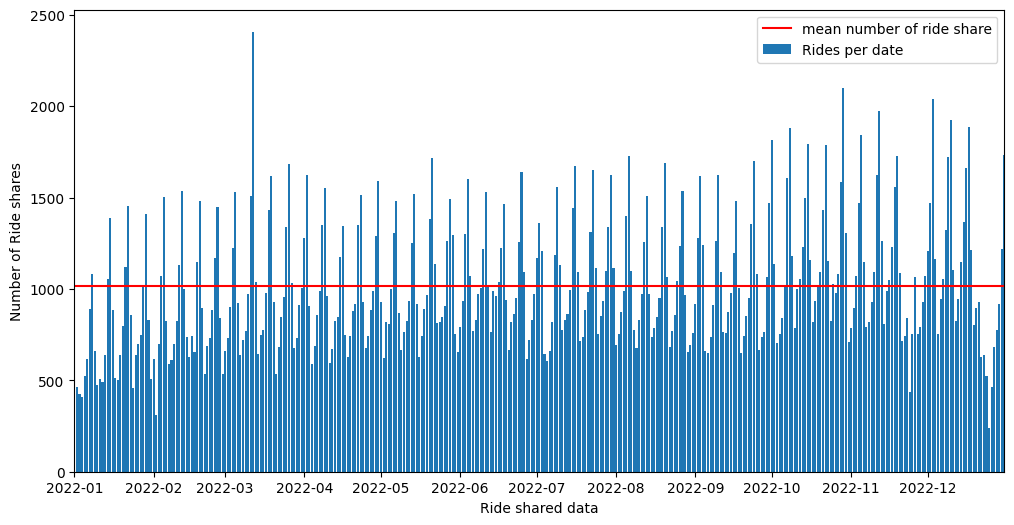

In [7]:
plt.figure(figsize=(12,6))
plt.bar(daily_rides['date'],daily_rides['daily_rides'],label='Rides per date')   #here date will be the x axis value and the daily rides value will be the height of the bar
plt.xlim(min(daily_rides['date']),max(daily_rides['date']))  #arranging the horizontal range of the histogram
plt.axhline(y = sample_mean,c='r',label='mean number of ride share')
plt.xlabel('Ride shared data')
plt.ylabel('Number of Ride shares')
plt.legend()
plt.show()


In [30]:
#now we are calculating the margin of error
confidence_level = 0.95  
alpha = 1 - confidence_level   #this is the significant level
alpha = alpha / 2   #for two tailed test , the significant region is splitted into halves
n=len(daily_rides)  #total number of samples or sample size
#as we dont have the poppulation parameters data , we must use sample parameters and so it is a t distribution
critical_value = scipy.stats.t.ppf(1-alpha,df =n-1) 
#based on area to the left of significant region and degree of freedom , we calculated critical value
print(f'The critical value for the confidence_level of {confidence_level} is : {critical_value}')



The critical value for the confidence_level of 0.95 is : 1.966502568799364


In [35]:
confidence_interval = critical_value * (sample_std / np.sqrt(n))     #margin of error 
confidence_interval  #this is also known as margin of error
print(f'The error will be no more than {confidence_interval:.2f} with the confidence level of {confidence_level*100}')

The error will be no more than 36.50 with the confidence level of 95.0


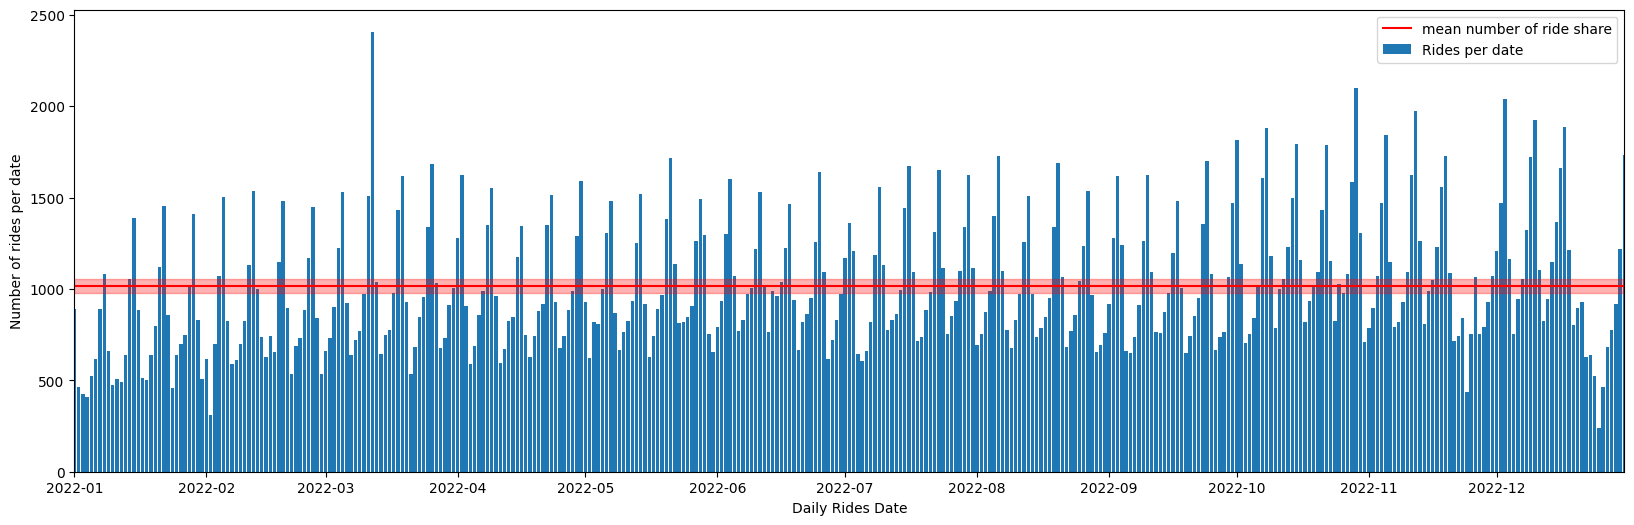

In [41]:
plt.figure(figsize=(20,6))
plt.bar(daily_rides['date'],daily_rides['daily_rides'],label='Rides per date')
plt.axhline(y = sample_mean,c='r',label='mean number of ride share')
plt.fill_between(daily_rides['date'],sample_mean - confidence_interval,sample_mean +  confidence_interval,color='r',alpha=0.3)
plt.xlim(min(daily_rides['date']),max(daily_rides['date']))
plt.xlabel('Daily Rides Date')
plt.ylabel('Number of rides per date')
plt.legend()
plt.show()

In [42]:
#as we can see from the plot above, the confidence interval is narrow around the sample mean , it means that with 95% confidence level we can say that the true population mean is near to the sample mean within this confidence interval
#or the true population mean doesnot lie outside this confidence interval

In [45]:
#as the number of rides in the holidays week is much lower , we are going to calculate the confidence interval separately for this weeks
daily_rides_holidays = daily_rides[daily_rides['date']>'2022-12-18']
daily_rides_holidays
n=len(daily_rides_holidays)  #total number of datas in the holiday weeks
confidence_level = 0.95
alpha = 1 - confidence_level
alpha = alpha / 2  #two tailed test
df_holiday = n - 1  
critical_value_holiday = scipy.stats.t.ppf(1-alpha,df_holiday)
critical_value_holiday  #ciritcal value for the confidence interval of holiday weeks


np.float64(2.1788128296672284)

In [48]:
holiday_sample_mean = daily_rides_holidays['daily_rides'].mean()
holiday_sample_std = daily_rides_holidays['daily_rides'].std()
print(f'The sample mean and the sample std for holiday weeks are {holiday_sample_mean} and {holiday_sample_std} respectively')
holiday_moe =  critical_value_holiday * holiday_sample_std / np.sqrt(n) #calculating the margin of error

The sample mean and the sample std for holiday weeks are 803.1538461538462 and 371.49918038353866 respectively


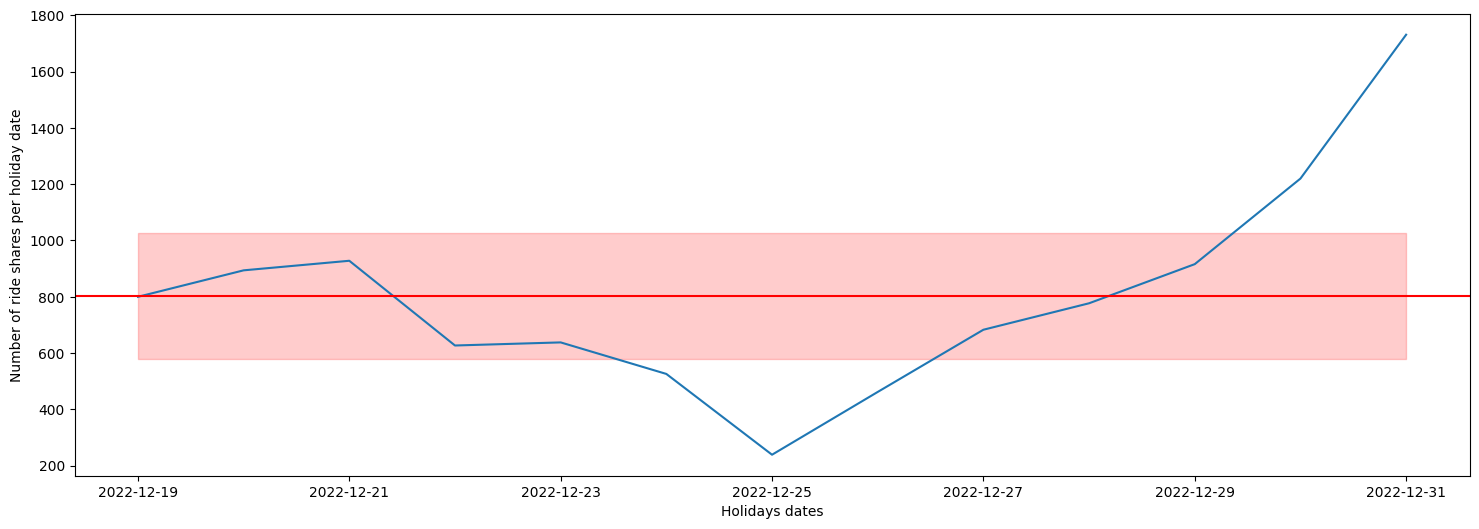

In [49]:
plt.figure(figsize = (18,6))
plt.plot(daily_rides_holidays['date'],daily_rides_holidays['daily_rides'],label='Rides per holiday date')
plt.axhline(y=holiday_sample_mean,c='r',label='sample mean of ride share in holiday weeks')
plt.fill_between(daily_rides_holidays['date'],holiday_sample_mean - holiday_moe , holiday_sample_mean + holiday_moe,color='red',alpha = 0.2)
plt.xlabel('Holidays dates')
plt.ylabel('Number of ride shares per holiday date')
plt.show()

In [50]:
#as we can see from the plot above the sample mean is 800 rides , and the confidence interval is within 600-1000 , so with 95 % confidence level we can say that the true population mean or mean number of rides 
#in holiday weeks lie with in this interval or doesnot lie outside this interval

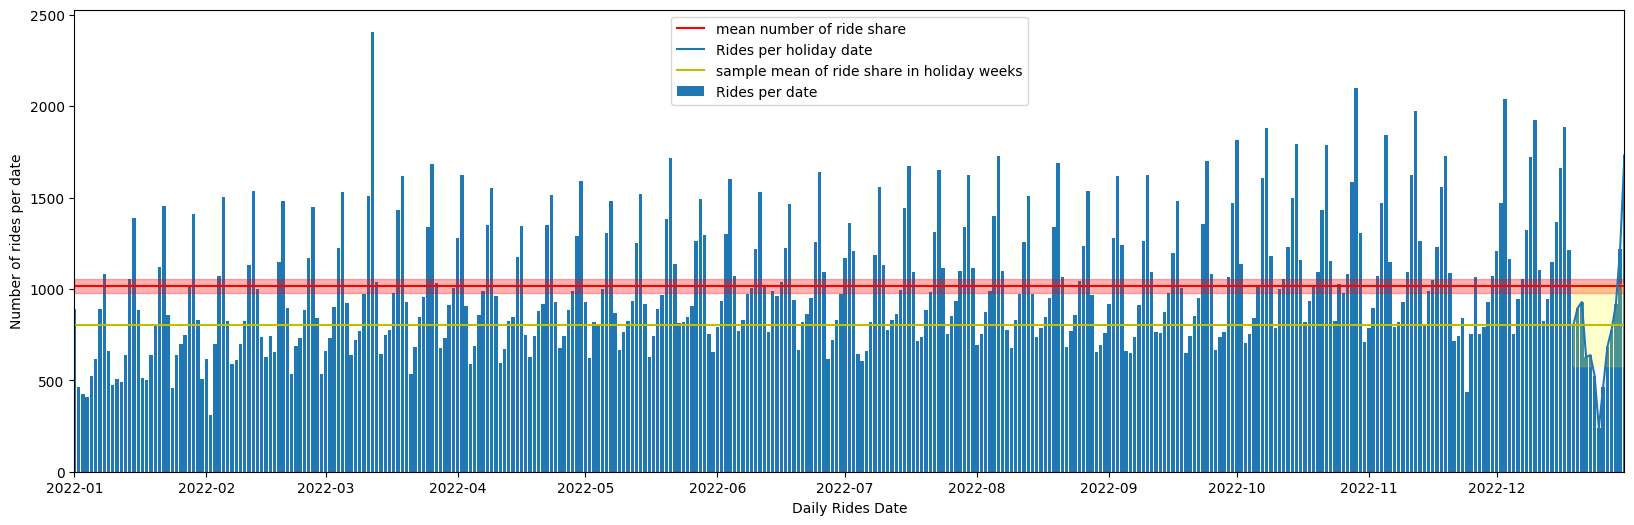

In [51]:
#plotting the two diagrams together
plt.figure(figsize=(20,6))
plt.bar(daily_rides['date'],daily_rides['daily_rides'],label='Rides per date')
plt.axhline(y = sample_mean,c='r',label='mean number of ride share')
plt.fill_between(daily_rides['date'],sample_mean - confidence_interval,sample_mean +  confidence_interval,color='r',alpha=0.3)
plt.plot(daily_rides_holidays['date'],daily_rides_holidays['daily_rides'],label='Rides per holiday date')
plt.axhline(y=holiday_sample_mean,c='y',label='sample mean of ride share in holiday weeks')
plt.fill_between(daily_rides_holidays['date'],holiday_sample_mean - holiday_moe , holiday_sample_mean + holiday_moe,color='yellow',alpha = 0.2)
plt.xlim(min(daily_rides['date']),max(daily_rides['date']))
plt.xlabel('Daily Rides Date')
plt.ylabel('Number of rides per date')
plt.legend()
plt.show()

In [52]:
#as we can observe from the diagram above that with the high number of samples , the confidence interval is much narrower compared to that of holiday weeks having limited nummber of samples
#This experiment or plot also illustrates the idea of the law of large number

In [53]:
daily_rides['date']

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
360   2022-12-27
361   2022-12-28
362   2022-12-29
363   2022-12-30
364   2022-12-31
Name: date, Length: 365, dtype: datetime64[ns]

In [55]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides['weekday'] = daily_rides['date'].apply(lambda x:weekdays[x.weekday()])  #here we are creating a new column called weekday based on the index of the date 
#provided using the .weekday() api
daily_rides

,date,daily_rides,weekday
0,2022-01-01,888,Saturday
1,2022-01-02,464,Sunday
2,2022-01-03,424,Monday
3,2022-01-04,407,Tuesday
4,2022-01-05,521,Wednesday
...,...,...,...
360,2022-12-27,683,Tuesday
361,2022-12-28,777,Wednesday
362,2022-12-29,916,Thursday
363,2022-12-30,1220,Friday


In [58]:
#studying the data of the daily rides based on the weekday
weekdays_summary = daily_rides.groupby('weekday')['daily_rides'].describe()
weekdays_summary.reindex(weekdays)

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
Monday,52.0,672.923077,106.491617,424.0,621.25,677.0,763.00,824.0
Tuesday,52.0,753.115385,129.007927,407.0,679.00,744.0,818.50,1029.0
Wednesday,52.0,835.000000,146.964848,309.0,769.50,848.0,898.00,1150.0
Thursday,52.0,951.269231,172.943957,438.0,904.00,972.0,1026.25,1365.0
Friday,52.0,1292.538462,207.808119,638.0,1192.00,1285.5,1432.00,1721.0
Saturday,53.0,1591.415094,289.486511,526.0,1482.00,1600.0,1725.00,2407.0
Sunday,52.0,1001.576923,196.720798,239.0,914.50,1036.0,1132.25,1307.0


In [59]:
#as we can observe from the group above that the mean value on friday and saturday is higher compared to that of other weekdays
#so inorder to prove this we do hypothesis testing
fridays_saturdays = daily_rides[daily_rides['weekday'].isin(['Friday','Saturday'])]['daily_rides']
other_days = daily_rides[daily_rides['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Sunday'])]['daily_rides']
other_days

1      464
2      424
3      407
4      521
5      614
      ... 
358    239
359    462
360    683
361    777
362    916
Name: daily_rides, Length: 260, dtype: int64

In [60]:
#hypothesis testing
scipy.stats.ttest_ind(a=fridays_saturdays,b=other_days,alternative='greater')  #here the alternative hypothesis states that the mean of the a is greater than that of b


TtestResult(statistic=np.float64(22.838843331723027), pvalue=np.float64(1.6667954539948009e-72), df=np.float64(363.0))

In [9]:
#as we can observe that the p-value is much smaller compared to the significant level 0.05, so we reject the null hypothesis
df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,len_date,date
3,36c8a2a4cd85fb32ae32170550d2a4d30b8df8a1,2022-01-01 00:00:00,2022-01-01 00:15:00,243.0,1.0,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,0,1,41.936310,-87.651563,POINT (-87.6515625922 41.9363101308),41.943155,-87.640698,POINT (-87.640698076 41.9431550855),16,2022-01-01
4,493f7bbcba1d96bf10bd579fe1c4b7ddb95fd3a6,2022-01-01 00:00:00,2022-01-01 00:15:00,364.0,1.3,1.703107e+10,1.703106e+10,7.0,6.0,5.0,...,0,1,41.921855,-87.646211,POINT (-87.6462109769 41.9218549112),41.936237,-87.656412,POINT (-87.6564115308 41.9362371791),16,2022-01-01
5,5d07bc7d3534b93fd0c862b69b161857a6f43f52,2022-01-01 00:00:00,2022-01-01 00:15:00,467.0,2.2,1.703107e+10,1.703124e+10,7.0,24.0,7.5,...,0,1,41.928763,-87.665677,POINT (-87.665676837 41.9287630064),41.899737,-87.664954,POINT (-87.6649539167 41.8997373884),16,2022-01-01
8,8e49900df0154a3f1fe40fdff266a11d01a7f121,2022-01-01 00:00:00,2022-01-01 00:15:00,315.0,1.2,1.703184e+10,1.703183e+10,32.0,28.0,7.5,...,0,1,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),16,2022-01-01
11,be1aadeb82f5fb96fb05dfc8ff36a7908e529a44,2022-01-01 00:00:00,2022-01-01 00:15:00,964.0,1.5,1.703183e+10,1.703132e+10,28.0,32.0,10.0,...,0,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),16,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691089,b47ec92aab303d25a6bf6582415a6f4e04ad4eb7,2022-12-31 11:45:00,2022-12-31 11:45:00,529.0,1.3,1.703106e+10,1.703106e+10,6.0,6.0,7.5,...,0,1,41.943237,-87.643471,POINT (-87.6434709559 41.9432371225),41.949140,-87.656804,POINT (-87.6568039088 41.9491397709),16,2022-12-31
691090,bf1db02bb45bed585268230a058ab88cc3469fb4,2022-12-31 11:45:00,2022-12-31 11:45:00,624.0,3.0,1.703107e+10,1.703108e+10,7.0,8.0,7.5,...,0,1,41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),41.900221,-87.629105,POINT (-87.6291051864 41.9002212967),16,2022-12-31
691091,c7d85af3607e891ed2ddc34d6f77f5d05d59cfd6,2022-12-31 11:45:00,2022-12-31 11:45:00,519.0,0.7,1.703106e+10,1.703107e+10,6.0,7.0,5.0,...,0,1,41.936159,-87.661265,POINT (-87.6612652184 41.936159071),41.928967,-87.656157,POINT (-87.6561568309 41.9289672664),16,2022-12-31
691093,d9ef6950b69863d6dfcf90c3e51699acdfe95e28,2022-12-31 11:45:00,2022-12-31 11:45:00,258.0,0.5,1.703108e+10,1.703108e+10,8.0,8.0,5.0,...,0,1,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),16,2022-12-31


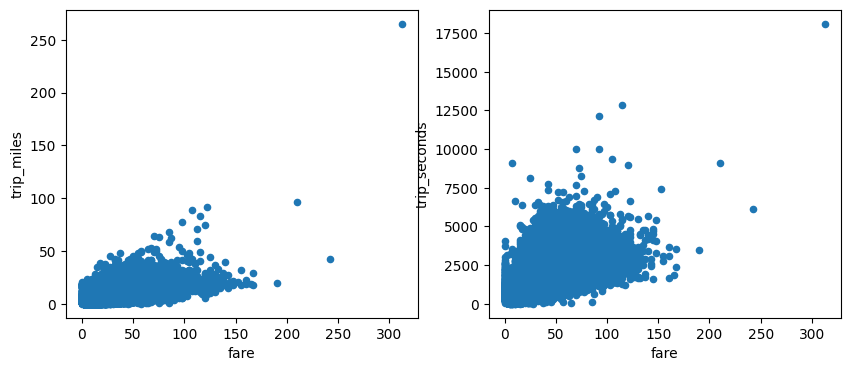

In [10]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
df.plot.scatter('fare','trip_miles',ax=ax[0])
df.plot.scatter('fare','trip_seconds',ax=ax[1])
plt.show()  

In [11]:
#as observed from the plot above , those two variables are highly correlated so we can train the linear regression model using those two variables
model = smf.ols('fare ~ trip_seconds + trip_miles', data=df)  #here are training our model using fare as dependent variable
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                 1.954e+05
Date:                Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:02:30   Log-Likelihood:            -1.3245e+06
No. Observations:              370679   AIC:                         2.649e+06
Df Residuals:                  370676   BIC:                         2.649e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.6089      0.025    267.196      0.000       6.560       6.657
trip_seconds     0.0069    3.8e-05    181.069      0.000       0.007       0.007
trip_miles       0.8925      0.005    176.225      0.000       0.883       0.902
==============================================================================
Omnibus:                   173649.885   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1764681.962
Skew:                           2.008   Prob(JB):                         0.00
Kurtosis:                      12.906   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
result.params  #this gives us the starting cost of fare , and the cost of fare per trip second as well as mile

Intercept       6.608908
trip_seconds    0.006887
trip_miles      0.892453
dtype: float64

In [13]:
initial_cost = result.params['Intercept']
cost_per_seconds = result.params['trip_seconds']
cost_per_miles = result.params['trip_miles']
def calculate_total_fare(trip_time,trip_distance):
    return initial_cost + (cost_per_seconds * trip_time) + (cost_per_miles * trip_distance)
sample_trip_duration = 10 * 60 # 10 minutes
sample_trip_distance = 10 # 10 miles
sample_fare = calculate_total_fare(sample_trip_duration, sample_trip_distance)

print(f"For a {sample_trip_distance} mile trip that takes {sample_trip_duration/60} minutes, you would pay around {sample_fare:.3} USD.")    
    

For a 10 mile trip that takes 10.0 minutes, you would pay around 19.7 USD.


C:\Users\ashok\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


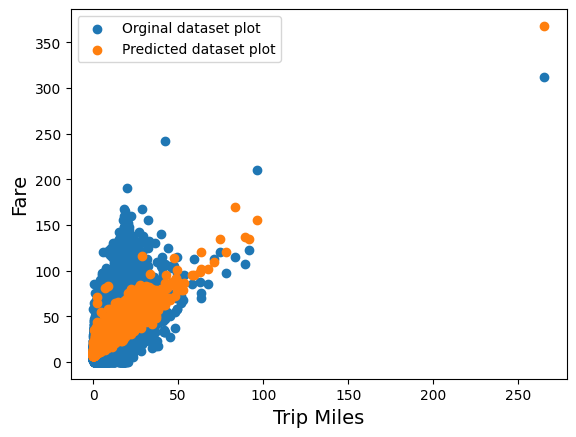

In [16]:
#now comparing the original data and the predicted data using scatter plot method
X_Y = df[['trip_seconds','trip_miles','fare']].dropna()
x_variable = 'trip_miles'
x_plot = X_Y['trip_miles']
y_variable = X_Y['fare']
y_result = result.predict()  #prediction of fare using the model

plt.scatter(x_plot,y_variable,label='Orginal dataset plot')
plt.scatter(x_plot,y_result,label='Predicted dataset plot')

plt.xlabel(' '.join(x_variable.split('_')).title(),fontsize = 14)
plt.ylabel('Fare',fontsize = 14)
plt.legend()
plt.show()
